In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import kagglehub

from sklearn.preprocessing import LabelEncoder

In [72]:
# Download latest version
path = 'DataSets/Loan Prediction DataSet/archive'

df = pd.read_csv(path+'/train.csv')

In [73]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [74]:
df = df.drop('Loan_ID',axis = 1)

In [75]:
df = df.dropna()

In [76]:
#Defining the dataset

# Initialize LabelEncoder
label_encoder = LabelEncoder()



df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])
df['LoanAmount'] = df['LoanAmount'].fillna(0)  # Replace with 0 or any other value


Y_df = df['Loan_Status']

In [77]:
df = df.drop('Loan_Status',axis = 1)

In [78]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [79]:
Y_df

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [80]:
#Convert to numpy array

X_data_array = df.to_numpy()
Y_data_array = Y_df.to_numpy()
print(Y_data_array)

[0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1
 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0
 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [81]:
#Test Train split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_data_array,Y_data_array,test_size=0.05, shuffle = True)


m = X_train.shape

In [82]:
print(X_train.shape)
print(Y_train.shape)


(456, 11)
(456,)


In [83]:
print(X_test.shape)
print(Y_test.shape)

(24, 11)
(24,)


In [84]:
for x in X_train:
    print(x)

[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 5.316e+03 0.000e+00
 1.360e+02 3.600e+02 1.000e+00 2.000e+00]
[1.00e+00 1.00e+00 1.00e+00 0.00e+00 0.00e+00 8.08e+03 2.25e+03 1.80e+02
 3.60e+02 1.00e+00 2.00e+00]
[1.00e+00 1.00e+00 1.00e+00 0.00e+00 0.00e+00 5.50e+03 1.26e+03 1.70e+02
 3.60e+02 1.00e+00 0.00e+00]
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.995e+03 0.000e+00
 6.000e+01 3.600e+02 1.000e+00 2.000e+00]
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 8.333e+03 0.000e+00
 2.800e+02 3.600e+02 1.000e+00 1.000e+00]
[1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 2.717e+03 0.000e+00
 6.000e+01 1.800e+02 1.000e+00 2.000e+00]
[1.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.92000000e+03 1.61200008e+01 8.70000000e+01
 3.60000000e+02 1.00000000e+00 0.00000000e+00]
[1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 9.083e+03 0.000e+00
 2.280e+02 3.600e+02 1.000e+00 1.000e+00]
[1.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 1.6667

In [89]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)

/opt/miniconda3/envs/gpu-test/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
Y_pred = log_reg.predict(X_test)

In [91]:
Y_test

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1])

In [ ]:
#Confusion Matrix

In [92]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)

print(cm)

[[ 5  3]
 [ 0 16]]


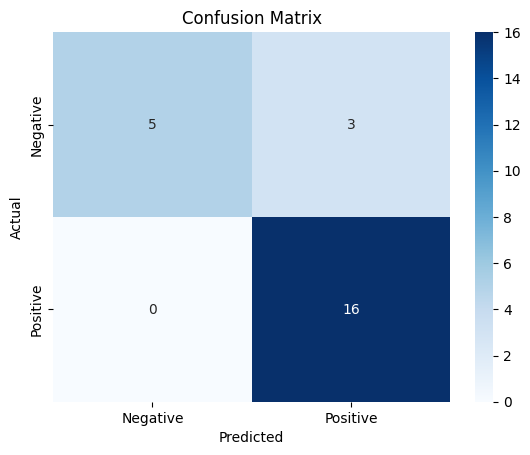

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()